In [43]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
dataset.head(3)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000


In [45]:
# Creating a matrix of features for independent variable, and vector of dependent variable
# Indexes in python start with zero
# Removing last column of dataset, which is dependent variable
# as x select only 1st column i.e 'level' upperbound is not included in python
# we use 1:2 as we need matrix not a vector
x = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [46]:
print('x shape (matrix of feature): ', x.shape)
print('y shape (vector): ', y.shape)

x shape (matrix of feature):  (10, 1)
y shape (vector):  (10,)


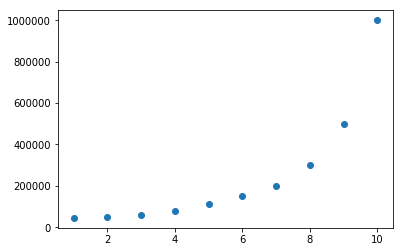

In [47]:
#Plot x and y
plt.scatter(x,y)

In [48]:
# Not required to split data to training and test set as data set contains of only 10 observations
#Fitting Linear Regression to dataset
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()
linear_regressor.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [49]:
#Fitting Polynomial Regression  with degree 2 to dataset
from sklearn.preprocessing import PolynomialFeatures

polynomial_regressor = PolynomialFeatures(degree=2)
x_poly = polynomial_regressor.fit_transform(x)

# As new columns has to be created we use fit_transform
# x0 is created automatically, x1 is the level column and x2 is square of level

In [50]:
#Linear regression is used as the coeff b0, b1 etc . are linearly associated with the dependent variable 
# even though the independent variables are not.
#Include this newly created x_poly in linear regression model
linear_poly_regressor = LinearRegression()
linear_poly_regressor.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

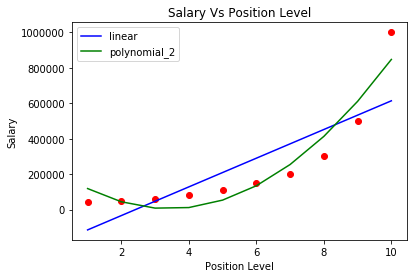

In [51]:
#Visualising Regression Results
plt.scatter(x, y, color = 'red')
plt.plot(x, linear_regressor.predict(x), color = 'blue', label='linear')
plt.plot(x, linear_poly_regressor.predict(polynomial_regressor.fit_transform(x)), color = 'green', label='polynomial_2')
plt.title('Salary Vs Position Level')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()

In [52]:
#Fitting Polynomial Regression  with degree 3 to dataset
polynomial_3_regressor = PolynomialFeatures(degree=3)
x_poly_3 = polynomial_3_regressor.fit_transform(x)

# As new columns has to be created we use fit_transform

In [53]:
#Include this newly created x_poly3 in linear regression model
linear_poly_3_regressor = LinearRegression()
linear_poly_3_regressor.fit(x_poly_3, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [54]:
#Fitting Polynomial Regression  with degree 4 to dataset
polynomial_4_regressor = PolynomialFeatures(degree=4)
x_poly_4 = polynomial_4_regressor.fit_transform(x)

# As new columns has to be created we use fit_transform

In [55]:
#Include this newly created x_poly4 in linear regression model
linear_poly_4_regressor = LinearRegression()
linear_poly_4_regressor.fit(x_poly_4, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

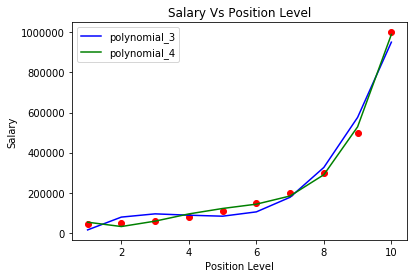

In [56]:
#Visualising Regression Results
plt.scatter(x, y, color = 'red')
plt.plot(x, linear_poly_3_regressor.predict(polynomial_3_regressor.fit_transform(x)), color = 'blue', label='polynomial_3')
plt.plot(x, linear_poly_4_regressor.predict(polynomial_4_regressor.fit_transform(x)), color = 'green', label='polynomial_4')
plt.title('Salary Vs Position Level')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()

# Degree 4 seems to be a perfect fit for the model

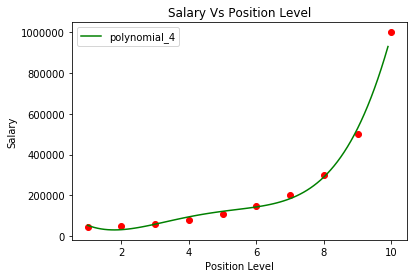

In [57]:
# For better precision, to get a more continuous curve
#Increment from a to 10 with high resolution like 0.1
x_grid = np.arange(min(x), max(x), 0.1)

# We need x_grid as a matrix so we use reshape function
x_grid = x_grid.reshape(len(x_grid), 1)

plt.scatter(x, y, color = 'red')
#plt.plot(x_grid, linear_poly_3_regressor.predict(polynomial_3_regressor.fit_transform(x)), color = 'blue', label='polynomial_3')
plt.plot(x_grid, linear_poly_4_regressor.predict(polynomial_4_regressor.fit_transform(x_grid)), color = 'green', label='polynomial_4')
plt.title('Salary Vs Position Level')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()

In [59]:
# Predict new result with Linear Regression 
# For level 6.5
linear_regressor.predict(6.5)

array([330378.78787879])

In [61]:
# Predict new result with Polynomial Regression 
linear_poly_4_regressor.predict(polynomial_4_regressor.fit_transform(6.5))

array([158862.45265153])